In [2]:
___Author___='LumberJack Jyss'

In [3]:
print('Algo LumberJack FROM KEREAS with memory\nLumberJack Jyss (c)')

Algo LumberJack FROM KEREAS with memory
LumberJack Jyss (c)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas as pd
from pandas import read_csv
import math
import keras
import sklearn
from keras.models import *
from keras.layers import *
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


In [5]:
# Setting the data
start = pd.to_datetime('2016-03-31')
end = pd.to_datetime('2019-03-28')
delta = round((end-start).days)
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')

Période d'étude :  1092
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  874  jours 
Bloc 2 : 218  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


In [6]:
Algo = ReLU #LSTM SimpleRNN GRU ReLU RNN NN
nbneurons = 3000 #round(len(train_X)*2)
ntimstep = 1 # incrémentation du timeframe
nbfeature = 2 # nombre de colonnes dans le input
activation = 'linear' #'tanh' # 'sigmoid' 'linear' 'Softmax activation' 'softmax'
batchsize = 1 # incrémentation du tick
nbepochs = 5000
loop = 500 # si on utilise le looping pour le reset_states()
laloss = 'mean_squared_error' # 'mean_squared_error' 'binary_crossentropy'
lemetrics =  ['accuracy'] # ['accuracy']
optimize = 'adam' # 'adam'
kernelinitializer = 'glorot_uniform'
recurrentinitializer = 'orthogonal'
biasinitializer = 'zeros'
recurrentactivation = 'hard_sigmoid'

print ("Activation d'un modèle de type",Algo," avec 4 layers identiques ayant respectivement ",nbneurons,', '\
       ,round(nbneurons/2),', ',round(nbneurons/4),' et ',round(nbneurons/8)," neurones. L'activation est de type "\
       ,activation," le loss, ",laloss," et les metrics, ",lemetrics,". L'optimisation est ",optimize,". Il y aura ",\
       nbepochs,'epochs.')

Activation d'un modèle de type <class 'keras.layers.advanced_activations.ReLU'>  avec 4 layers identiques ayant respectivement  3000 ,  1500 ,  750  et  375  neurones. L'activation est de type  linear  le loss,  mean_squared_error  et les metrics,  ['accuracy'] . L'optimisation est  adam . Il y aura  5000 epochs.


In [7]:
dataset = web.DataReader('AMZN','yahoo',start,end)
dataset = dataset.drop(['Low','High','Close'],axis=1)

In [8]:
data=pd.DataFrame(dataset)
data.dropna()
data.head()

,Open,Volume,Adj Close
Date,,,
2016-03-31,599.280029,2681800,593.640015
2016-04-01,590.489990,2917400,598.500000
2016-04-04,599.000000,2470800,593.190002
2016-04-05,590.770020,2308900,586.140015
2016-04-06,587.520020,2833500,602.080017


In [9]:
# specify columns to plot
groups=[]
for aa in range(len(dataset.columns)):
    groups.append(aa)
values = dataset.values

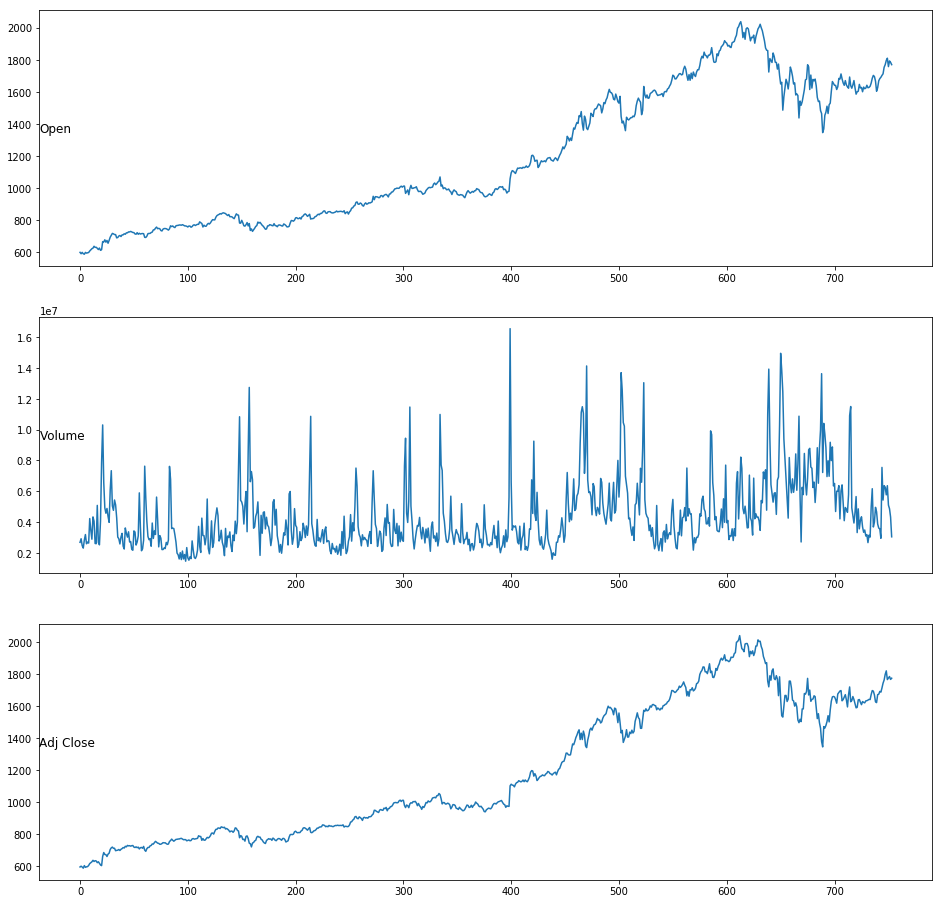

In [11]:
i = 1
# plot each column
plt.figure(figsize=(16,16))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='left')
	i += 1
plt.show()

In [12]:
data = data.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [14]:
train_X = data[0:bloc1,0:2]
test_X = data[bloc1:,0:2]
train_y = data[0:bloc1,2]
test_y = data[bloc1:,2]

In [15]:
#input_train = train_X.values
#output_train = train_y.values
#input_test = test_X.values
#output_test = test_y.values

In [16]:
input_train = input_train#.astype(float)
output_train = output_train#.astype(float)
input_test = input_test#.astype(float)
output_test = output_test#.astype(float)

In [17]:
input_train.shape

NameError: name 'input_train' is not defined

In [ ]:
input_train = input_train.reshape((input_train.shape[0],1,input_train.shape[1]))
output_train = output_train.reshape(output_train.shape[0],1,1)#output_train.shape[1])
input_test = input_test.reshape((input_test.shape[0],1,input_test.shape[1]))
output_test = output_test.reshape(output_test.shape[0],1,1)#output_test.shape[1])

In [ ]:
input_train_shape = input_train.shape
output_train_shape = output_train.shape
input_test_shape = input_test.shape
output_test_shape = output_test.shape

In [ ]:
input_train_shape,output_train_shape,input_test_shape,output_test_shape

((754, 1, 2), (754, 1, 1), (0, 1, 2), (0, 1, 1))

In [ ]:
model = Sequential()
model.add(Algo(nbneurons,input_shape=(ntimstep,nbfeature)))#,stateful=True,\
               #kernelinitializer=kernelinitializer,recurrentinitializer = recurrentinitializer,\
        # biasinitializer='zeros',recurrent_activation==recurrentactivation,return_sequences=True))

model.add(Algo(round(nbneurons/2)))#,return_sequences=True))
model.add(Activation(activation))
model.add(Algo(round(nbneurons/4)))#,return_sequences=True))
model.add(Algo(round(nbneurons/8)))
model.add(Dense(1))


In [ ]:
model.compile(optimizer=optimize, loss=laloss,metrics=lemetrics) 

In [ ]:
#for i in range(loop):
history = model.fit(input_train, output_train, batch_size=batchsize, epochs=nbepochs)
#    model.reset_states()
#    print('Loop N°',i,'/',loop)
print('Modèle entrainé.')

Epoch 1/5000
754/754 [==============================] - 2s 2ms/step - loss: 1938447.5833 - acc: 0.0000e+00
Epoch 2/5000
754/754 [==============================] - 1s 2ms/step - loss: 941552.5998 - acc: 0.0000e+00
Epoch 3/5000
754/754 [==============================] - 1s 2ms/step - loss: 447559.0618 - acc: 0.0000e+00
Epoch 4/5000
754/754 [==============================] - 1s 2ms/step - loss: 246950.7637 - acc: 0.0000e+00
Epoch 5/5000
754/754 [==============================] - 1s 1ms/step - loss: 185899.0134 - acc: 0.0000e+00
Epoch 6/5000
754/754 [==============================] - 1s 1ms/step - loss: 173372.0003 - acc: 0.0000e+00
Epoch 7/5000
754/754 [==============================] - 1s 2ms/step - loss: 171756.0977 - acc: 0.0000e+00
Epoch 8/5000
754/754 [==============================] - 1s 2ms/step - loss: 171623.3063 - acc: 0.0000e+00
Epoch 9/5000
754/754 [==============================] - 1s 1ms/step - loss: 171646.3410 - acc: 0.0000e+00
Epoch 10/5000
754/754 [======================

In [ ]:
evaluation = model.evaluate(input_test, output_test,verbose=2,batch_size=batchsize)
evaluation

In [ ]:
X=[[21],[63]] #=>84
X = np.array(X).T
X = X.reshape(X.shape[0],1,X.shape[1])

In [ ]:
predictions = model.predict(X,verbose=1)
predictions


In [ ]:
# evaluate the model
scores = model.evaluate(input_test,output_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("ModelMulti-NoNorm.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("ModelMulti-NoNorm-yaml.h5")
print("Saved model to disk")

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("ModelMulti-NoNorm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("ModelMulti-NoNorm-JSON.h5")
print("Saved model to disk")

___________________________________________________________________________________________________________________________

In [ ]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))